In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
titanic_data = pd.read_csv('D:/Chools/Day_09/Titanic.csv')

In [3]:
titanic_data.head()

,Unnamed: 0,Class,Gender,Age,Survived
0,1,3rd,Male,Child,No
1,2,3rd,Male,Child,No
2,3,3rd,Male,Child,No
3,4,3rd,Male,Child,No
4,5,3rd,Male,Child,No


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2201 non-null   int64 
 1   Class       2201 non-null   object
 2   Gender      2201 non-null   object
 3   Age         2201 non-null   object
 4   Survived    2201 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.1+ KB


In [5]:
titanic_data.columns

Index(['Unnamed: 0', 'Class', 'Gender', 'Age', 'Survived'], dtype='object')

In [6]:
titanic_data.isnull().sum()

Unnamed: 0    0
Class         0
Gender        0
Age           0
Survived      0
dtype: int64

In [7]:
# Drop the 'Unnamed: 0' column
titanic_data = titanic_data.drop('Unnamed: 0', axis=1)

In [8]:
# Data preprocessing - convert categorical variables into dummy/indicator variables
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Class', 'Gender', 'Age', 'Survived'])

In [9]:
# Apriori algorithm
frequent_itemsets = apriori(titanic_data_encoded, min_support=0.4, use_colnames=True)

In [10]:
# Association rules based on confidence
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

In [11]:
# Display the association rules
print(rules)

                   antecedents               consequents  antecedent support  \
0                 (Class_Crew)               (Age_Adult)            0.402090   
1                  (Age_Adult)             (Gender_Male)            0.950477   
2                (Gender_Male)               (Age_Adult)            0.786461   
3                (Survived_No)             (Gender_Male)            0.676965   
4                (Gender_Male)             (Survived_No)            0.786461   
5                (Survived_No)               (Age_Adult)            0.676965   
6     (Survived_No, Age_Adult)             (Gender_Male)            0.653339   
7   (Survived_No, Gender_Male)               (Age_Adult)            0.619718   
8     (Age_Adult, Gender_Male)             (Survived_No)            0.757383   
9                (Survived_No)  (Age_Adult, Gender_Male)            0.676965   
10               (Gender_Male)  (Survived_No, Age_Adult)            0.786461   

    consequent support   support  confi

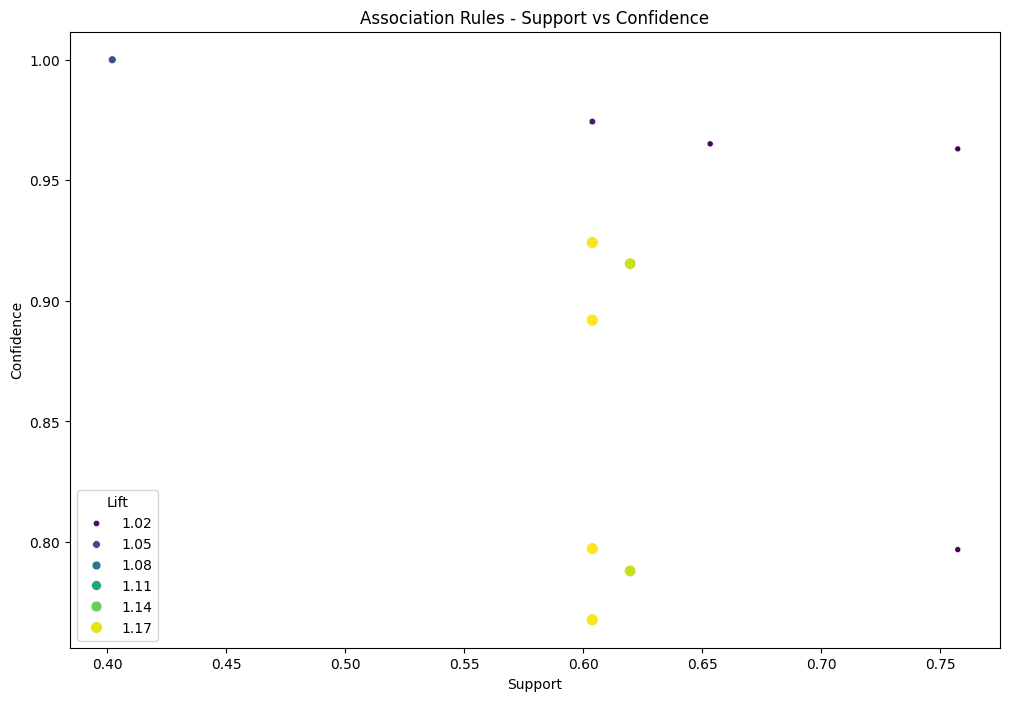

In [12]:
# Scatter plot of association rules with color
plt.figure(figsize=(12, 8))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', palette='viridis', data=rules)
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

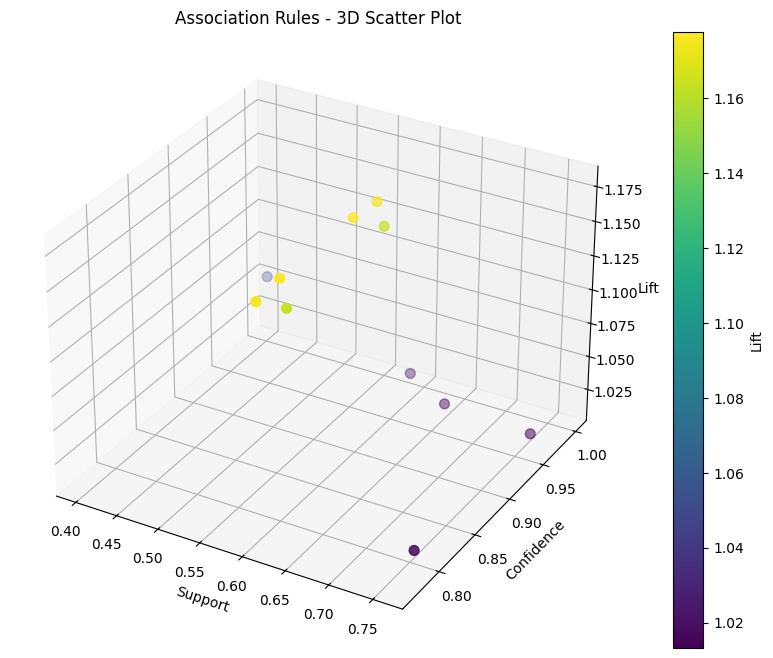

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of association rules
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with support, confidence, and lift as axes
scatter = ax.scatter(rules['support'], rules['confidence'], rules['lift'], c=rules['lift'], cmap='viridis', s=50)

# Customize plot labels
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
ax.set_title('Association Rules - 3D Scatter Plot')

# Add color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Lift')

plt.show()